핸즈온 4장 모델 훈련 p.184-203

# 4. 모델훈련
## 4.5 규제가 있는 선형 모델

### 4.5.1 릿지 회귀
릿지 회귀 (티호노프 규제) : 규제가 추가된 신형 회귀 버전

규제항
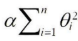
- 모델의 가중치가 가능한 한 작게 유지되도록 함
- 훈련하는 동안에만 비용 함수에 추가됨



하이퍼파라미터 alpha
- 모델을 얼마나 많이 규제할 지 조절
- alpha = 0 이면 릿지 회귀는 선형 회귀와 같아짐
- alpha 가 아주 크면 모든 가중치가 0에 가까워짐, 데이터의 평균을 지나는 수평선이 됨

릿지 회귀의 비용 함수

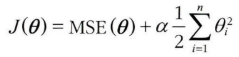


다양한 수준의 릿지 규제를 사용한 선형 회귀와 다항 회귀

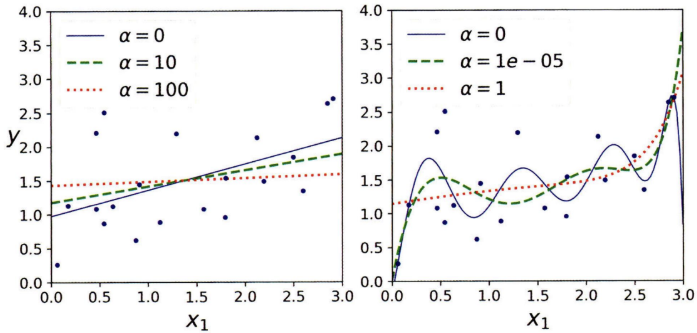

- alpha를 증가시킬수록 직선에 가까워짐

릿지 회귀 계산
- 선형 회귀와 비슷함
- 정규방정식 사용 or 경사 하강법 사용
- 릿지 회귀의 정규방정식
 image.png

사이킷런에서 정규방정식을 사용한 릿지 회귀를 적용하는 예시

In [ ]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver='cholesky')
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([3.54497074])

확률적 경사 하강법을 사용했을 때

In [ ]:
sgd_reg = SGDRegressor(penalty='l2')
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([-3.27195598])

- penalty 매개변수 : 사용할 규제 지정
- 'l2' : SGD가 비용 함수에 가중치 벡터의 l2 노름의 제곱을 2로 나눈 규제항을 추가하게 많듦 (릿지 회귀와 동일)

### 4.5.2 라쏘 회귀
라쏘 회귀 : 선형 회귀의 또 다른 규제된 버전
- 가중치 벡터의 l1 노름을 사용

 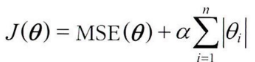

다양한 수준의 라쏘 규제를 사용한 선형 회귀와 다항 회귀

 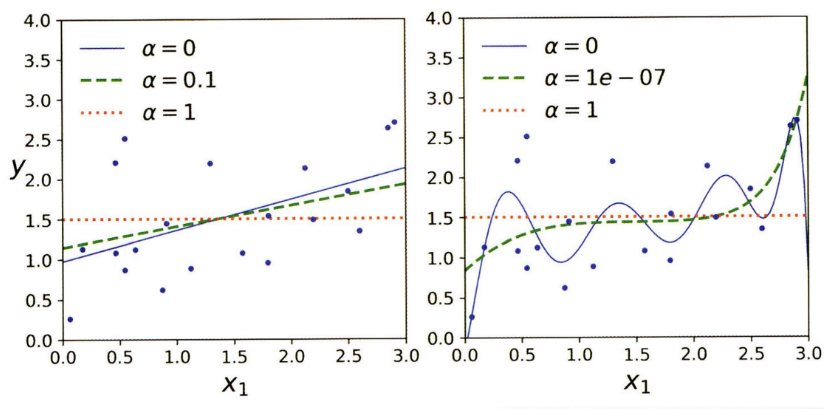

라쏘 회귀의 특성
- 가중치를 제거하여 0으로 만듦 : 자동으로 특성 선탤을 하고 희소 모델을 만듦

라쏘 대 릿지 규제

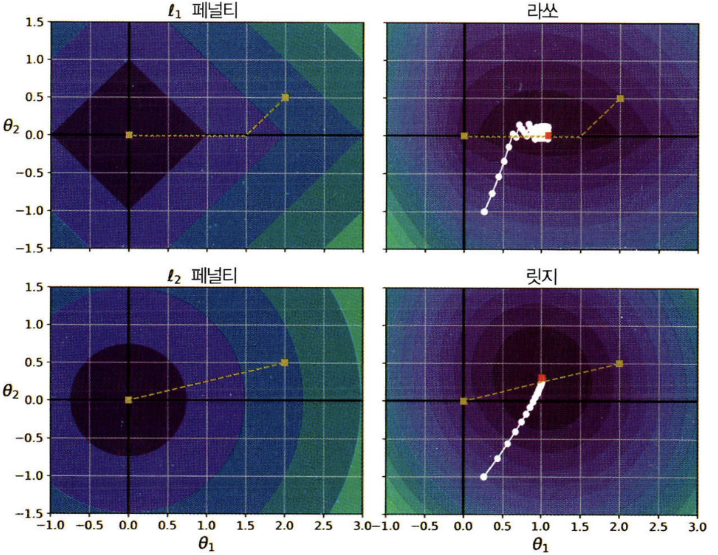

- 두 축 : 모델 파라미터 두 개, 배경의 등고선 : 각기 다른 손실 함수
- 왼쪽 위 그래프
 - 등고선 : l1 손실 (|theta1| + |theta2|)
 - 축에 가까워지면서 선형적으로 줄어듦
- 오른쪽 위 그래프
 - 등고선 : 라쏘 손실 함수 (l1 손실을 더한 MSE 손실 함수)
- 왼쪽 아래 그래프
 - l2 패널티 사용, l2 손실이 원점에 가까울수록 줄어듦
- 오른쪽 아래 그래프
 - 등고선 : 릿지 회귀의 비용 함수

라쏘 비용 함수에 경사 하강법 적용하기
- 서브그레이디언트 벡터 사용하기

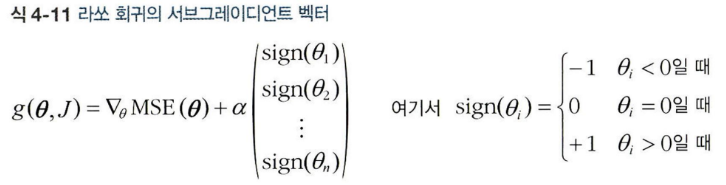

Lasso 클래스를 사용한 간단한 사이킷런 예제

In [ ]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([3.55226022])

### 4.5.3 엘라스틱넷
엘라스틱넷 : 릿지 회귀와 라쏘 회귀를 절충한 모델
- 규제항 : 릿지와 회귀의 규제항을 단순히 더해서 사용
- 혼합 정도 : 혼합 비율 r을 사용해 조절
 - r=0 일 때 엘라스틱넷 : 릿지 회귀와 동일
 - r=1 일 때 엘라스틱넷 : 라쏘 회귀와 동일

- 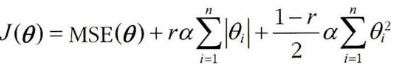


In [ ]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([3.57249858])

### 4.5.4 조기 종료
조기 종료 : 검증 에러가 최솟값에 도달하면 바로 훈련을 중지시키기

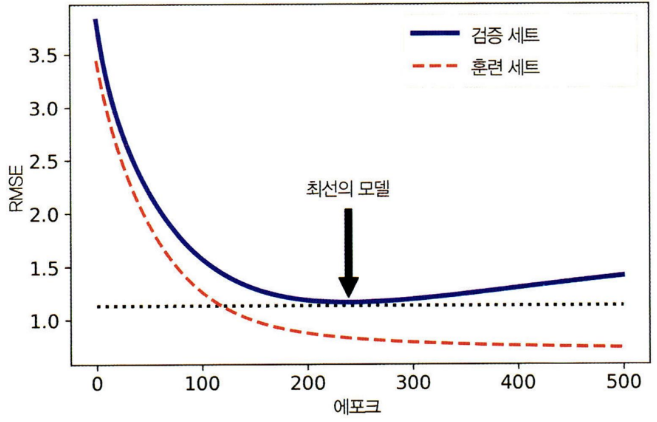

조기 종료를 위한 기본적인 구현 코드

In [ ]:
from sklearn.pipeline import Pipeline  # Pipeline을 임포트 추가
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.base import clone
import numpy as np

In [ ]:
from sklearn.base import clone

X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.2)

# 데이터 준비
poly_scaler = Pipeline([
    ('poly_features', PolynomialFeatures(degree=90, include_bias=False)),
    ('std_scaler', StandardScaler())
])
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=None, warm_start=True, penalty=None, learning_rate="constant", eta0=0.0005)

minimum_val_error = float('inf')
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled,y_train.ravel()) # 훈련을 이어서 진행
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

## 4.6 로지스틱 회귀
로지스틱 회귀 : 샘플이 특정 클래스에 속할 확률을 추정하는 데 사용
- 이진 분류기
- 추정 확률이 50%가 넘으면 모델은 그 샘플이 해당 클래스에 속한다고 예측 : 레이블이 '1'인 양성 클래스
- 아니면 속하지 않는다고 예측 : 레이블이 '0'인 음성 클래스

### 4.6.1 확률 추정
로지스틱 회귀 모델 : 입력 특성의 가중치 합을 계산, 결괏값의 로지스틱을 출력

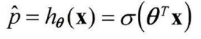

- 시그모이드 함수 : 0과 1 사이의 값을 출력
 - 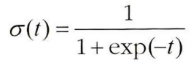

  - 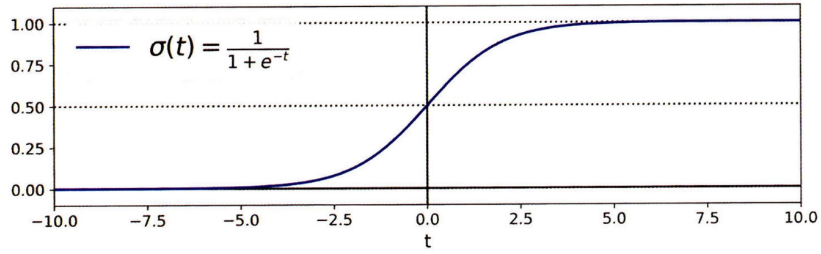

- 로지스틱 회귀 모델 예측
 - 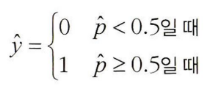

### 4.6.2 훈련과 비용 함수
로지스틱 회귀 모델 훈련의 목적

: 양성 샘플에 대해서는 높은 확률을 추정하고, 음성 샘플에 대해서는 낮은 확률을 추정하는 모델의 파라미터 벡터를 찾는 것

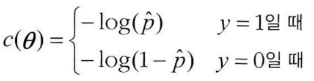

로지스틱 회귀의 비용 함수 (로그 손실)

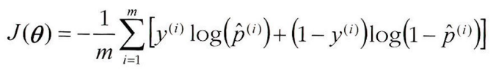

로지스틱 비용 함수의 편도함수

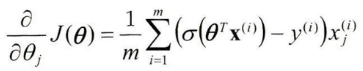

### 4.6.3 결정 경계
붓꽃 데이터셋 사용

꽃잎의 너비를 기반으로 Iris-Versicolor 종을 감지하는 분류기 생성

In [ ]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [ ]:
X = iris['data'][:,3:] # 꽃잎의 너비
y = (iris['target']==2).astype(int) # 1 Iris-Virginica면 1, 그렇지 않으면 0

로지스틱 회귀 모델 훈련

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X,y)

LogisticRegression()

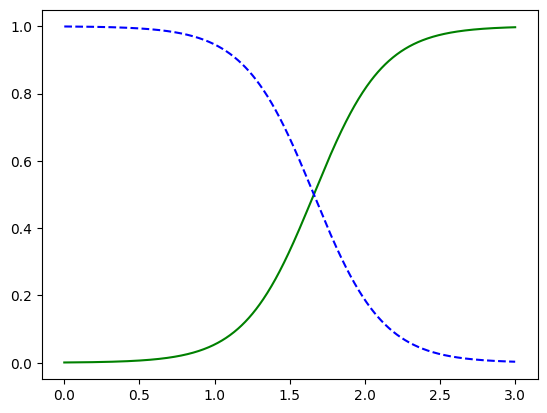

In [ ]:
X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:,1], 'g-', label='Iris virginica')
plt.plot(X_new, y_proba[:,0], 'b--', label='Not  Iris virginica')

In [ ]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

### 4.6.4 소프트맥스 회귀
소프트맥스 회귀 (다항 로지스틱 회귀) : 여러 개의 이진 분류기를 훈련시켜 연결하지 않고 직접 다중 클래스를 지원하도록 일반화하기

- 샘플 x가 주어지면 먼저 소프트맥스 회귀 모델이 각  클래스 k에 대한 점수 sk(x)를 계산
- 그 점수에 소프트맥스 함수(정규화된 지수 함수)를 적용하여 각 클래스의 확률을 추정

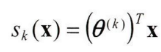

소프트맥스 함수

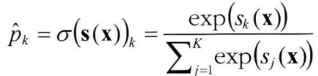
- K : 클래스 수
- s(x) : 샘플 x에 대한 클래스의 점수를 담은 벡터
- sigma(s(x))k : 샘플 x 에 대한 각 클래스의 점수가 주어졌을 때 이 샘플이 클래스 k에 속할 추정 확률

소프트맥스 회귀 분류기의 예측

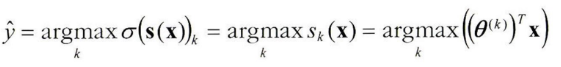

훈련 방법
- 목적 : 모델이 타깃 클래스에 대해서는 높은 확률을 추정하도록 만드는 것
- 크로스 엔트로피 비용 함수를 최소화하는 것 : 타깃 클래스에 대해 낮은 확률을 예측하는 모델을 억제함 -> 목적에 잘 부합함
 - 크로스 엔트로피 비용 함수

 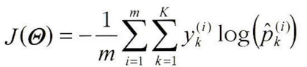

  - 클래스 k 에 대한 크로스 엔트로피의 그레이디언트 벡터

  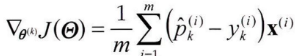

소프트맥스 회귀 사용
- solver 매개변수에 'lbfgs'와 같은 소프트맥스 회귀를 지원하는 알고리즘을 지정

In [ ]:
X = iris['data'][:, (2,3)] # 꽃잎 길이, 꽃잎 너비
y = iris['target']

softmax_reg = LogisticRegression(multi_class = 'multinomial', solver='lbfgs', C=10)
softmax_reg.fit(X,y)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(C=10, multi_class='multinomial')

In [ ]:
softmax_reg.predict([[5,2]])

array([2])

In [ ]:
softmax_reg.predict_proba([[5,2]])

array([[6.21626375e-07, 5.73689803e-02, 9.42630398e-01]])